# Mall Customer Segmentation - K Means Clustering

## The given dataset belongs to a mall who wants to find some insights off the data. Since the most important features would be the annual income and the spending score, we are going to use that to segment customers. The mall would then use this information to target their customer ads better.

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the dataset

Dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
Dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
X = Dataset.iloc[:, 3:5].values

## Unlike the KMeans algo, where we used the elbow method to find the optimal number of clusters, here we are going to use the dendrogram.

Text(0,0.5,'Euclidean Distances')

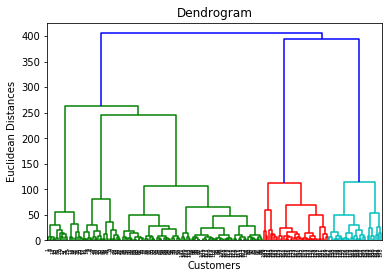

In [5]:
# Dendrogram

import scipy.cluster.hierarchy as sch
Dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')

## Therefore, it is clear from the dendrogram that the optimal number of clusters = 5

In [6]:
# To fit HC algo to the data

from sklearn.cluster import AgglomerativeClustering
HC = AgglomerativeClustering(n_clusters = 5, linkage = 'ward', affinity = 'euclidean')
y_HC = HC.fit_predict(X)

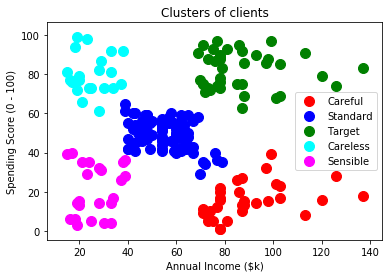

In [7]:
# Visualizing the clusters

plt.scatter(X[y_HC == 0, 0], X[y_HC == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_HC == 1, 0], X[y_HC == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_HC == 2, 0], X[y_HC == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_HC == 3, 0], X[y_HC == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_HC == 4, 0], X[y_HC == 4, 1], s = 100, c = 'magenta', label = 'Sensible')

plt.title("Clusters of clients")
plt.xlabel("Annual Income ($k)")
plt.ylabel("Spending Score (0 - 100)")
plt.legend()

# Conclusion: -

## The clustering is very similar to the K-means algorithm